# Pile up again


In [1]:
#Set up
import os, sys
sys.path.append(os.getcwd() + "/../")
from prep_ana_II import *
sys.path.append(os.getcwd() + "/../tools/")
from lepton_eff import muonEff, electronEff
from pile_up import pileUpFunction, Min_Bias

import matplotlib
matplotlib.rcParams.update({'font.size': 22})
import warnings
warnings.filterwarnings('ignore')

Welcome to JupyROOT 6.10/00
home /home/gunter/WW_analysis/production/Analysis_13TeV
Loading binning options...
Loading plotting options
unc_mc_process and scales are parameter dictionaries


In [2]:
%matplotlib inline

In [3]:
df = load_origMC()
#df_da = load_origDATA()

Warning in <TStreamerInfo::BuildCheck>: 
   The StreamerInfo of class string read from file /home/gunter/WW_analysis/data_alpha/dyjetstoll_m-50_complete.root
   has the same version (=2) as the active class but a different checksum.
   You should update the version to ClassDef(string,3).
   Do not try to write objects with the current class definition,
   the files will not be readable.

Warning in <TStreamerInfo::CompareContent>: The following data member of
the in-memory layout version 2 of class 'string' is missing from 
the on-file layout version 2:
   string::_Alloc_hider _M_dataplus; //
Warning in <TStreamerInfo::CompareContent>: The following data member of
the in-memory layout version 2 of class 'string' is missing from 
the on-file layout version 2:
   unsigned long _M_string_length; //
Warning in <TStreamerInfo::CompareContent>: The following data member of
the in-memory layout version 2 of class 'string' is missing from 
the on-file layout version 2:
   string::(anonymous) ;

In [4]:
from ROOT import TFile

In [14]:
f_66013 = TFile.Open("../tools/pileup_data/pileup_sf_2016_full_66013_bins75_in.root", "r")
f_72396 = TFile.Open("../tools/pileup_data/pileup_sf_2016_full_72386_bins75_in.root", "r")
f_69216 = TFile.Open("../tools/pileup_data/pileup_sf_2016_full_69216_bins75_in.root", "r")

In [15]:
graph_66013 = f_66013.Get("pileup_sf")
graph_72396 = f_72396.Get("pileup_sf")
graph_69216 = f_69216.Get("pileup_sf")

In [89]:
arr_66013 = []
arr_72396 = []
arr_69216 = []
x = []
bins = 100
for i in range(10, bins):
    arr_66013.append(graph_66013.Eval(60.0*i/float(bins)))
    arr_72396.append(graph_72396.Eval(60.0*i/float(bins)))
    arr_69216.append(graph_69216.Eval(60.0*i/float(bins)))
    x.append(80.0*i/float(bins))
    
arr_66013 = np.array(arr_66013)
arr_72396 = np.array(arr_72396)
arr_69216 = np.array(arr_69216)
x_ = np.array(x) - 60.0/(2*bins)

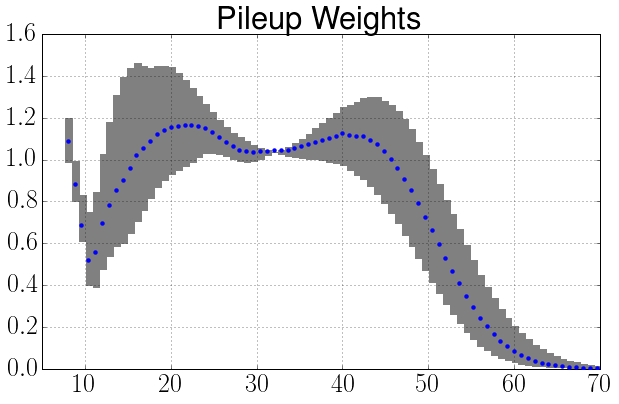

In [108]:
matplotlib.rcParams.update({'font.size': 26})

plt.figure(figsize=(10,6))
plt.title('Pileup Weights')

top = np.max(np.array([arr_66013, arr_72396]), axis=0)
bottom = np.min(np.array([arr_66013, arr_72396]), axis=0)
        
p1 = plt.bar(x_, top-bottom, color=[.50,.50,.50, 1], width=90.0/bins ,edgecolor=[0,0,0,0], zorder=2,
             bottom=bottom)
p3 = plt.scatter(x, arr_69216, zorder=3, edgecolors=[0,0,0,0], )#marker="_")

plt.grid()
plt.ylim(0,1.6)
plt.xlim(5,70)
plt.savefig("pileup_weights.pdf")
plt.show()

In [3]:
df_ww = rp.read_root("../data/gen_jets/WW_WW_32.root")

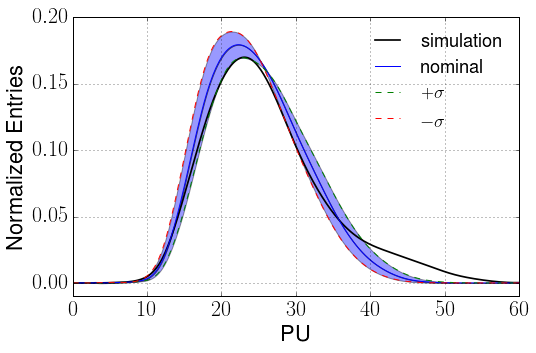

In [43]:
from scipy.interpolate import spline
a = np.histogram(df_ww.gen_pu, range=(0,60), bins=20, weights= np.ones(df_ww.shape[0]) /float(df_ww.shape[0]) )
b = np.histogram(df_ww.gen_pu, range=(0,60), bins=20, weights=df_ww.pileup_weight/float(df_ww.shape[0]))
c = np.histogram(df_ww.gen_pu, range=(0,60), bins=20, weights=df_ww.pileup_up_weight/float(df_ww.shape[0]))
d = np.histogram(df_ww.gen_pu, range=(0,60), bins=20, weights=df_ww.pileup_down_weight/float(df_ww.shape[0]))

xnew = np.linspace(0, a[1].max(),300) #300 represents number of points to make between T.min and T.max

nominal = spline(a[1][1:], a[0], xnew)
pu      = spline(b[1][1:], b[0], xnew)
pu_up   = spline(c[1][1:], c[0], xnew)
pu_down = spline(d[1][1:], d[0], xnew)

matplotlib.rcParams.update({'font.size': 22})
plt.figure(figsize=(8, 5))

plt.plot(xnew, nominal, label="simulation", linewidth=1.7, color="black")
plt.plot(xnew, pu, label="nominal")
plt.plot(xnew, pu_up, "--", label="$+\sigma$")
plt.plot(xnew, pu_down, "--", label="$-\sigma$")
plt.fill_between(xnew, pu, pu_up, alpha=0.4)
plt.fill_between(xnew, pu, pu_down, alpha=0.4)

plt.grid(True)
plt.ylim(-0.01, 0.2)
plt.legend(frameon=False, fontsize="small")
plt.xlabel("PU")
plt.ylabel("Normalized Entries")
plt.savefig("/home/gunter/WW_analysis/PAPER/myDir/notes/AN-17-169/trunk/FIGS/plots/pu_shape.pdf")
plt.show()